$$ Ahmed \space Azzam $$

$$ Adult \space Income \space Prediction $$

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Reading Data

In [3]:
df= pd.read_csv('G://iTi matrial//ML//adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
len(df)

32561

# Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
df['income']= LabelEncoder().fit_transform(df['income'])

# EDA

# Fixing the common nan values

In [36]:
attrib, counts = np.unique(df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['workclass'][df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['occupation'][df['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['native.country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['native.country'][df['native.country'] == '?'] = "United-States" 

C:\Temp\ipykernel_3708\1070894677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'][df['workclass'] == '?'] = most_freq_attrib
C:\Temp\ipykernel_3708\1070894677.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'][df['occupation'] == '?'] = most_freq_attrib
C:\Temp\ipykernel_3708\1070894677.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native.country'][df['native.country'] == '?'] = "United-

# Visualize the data (all the columns)

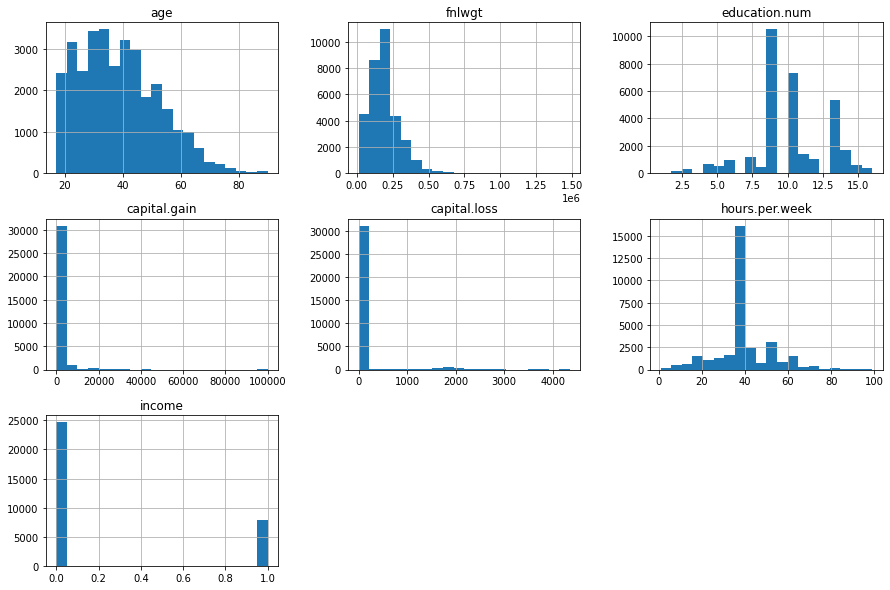

In [37]:
df.hist(figsize=(15,10),bins=20);

In [38]:
df.var()

C:\Temp\ipykernel_3708\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.524590e+02
income            1.828259e-01
dtype: float64

In [39]:
from sklearn.model_selection import train_test_split 
train_data,val_data= train_test_split(df, test_size= 0.20, random_state=0) 

In [40]:
len(df.columns)

15

In [41]:
train_data=train_data.apply(LabelEncoder().fit_transform)

In [42]:
train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
15282,24,3,11578,15,9,2,11,0,4,1,0,0,50,38,0
24870,8,1,10164,9,12,4,2,3,4,1,0,0,24,38,0
18822,8,3,9010,11,8,4,0,4,2,0,0,0,39,38,0
26404,36,3,4986,11,8,6,6,1,4,0,0,0,39,38,0
7842,7,3,4943,9,12,4,4,3,4,0,0,0,39,38,0


In [ ]:
# min_max_scaler = MinMaxScaler()
# std_scaler = StandardScaler()
# # fitting
# if len(feats_min_max_scale)>0 and len(feats_std_scale):
#     min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
#     std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
# # transforming min_max_scale
#     min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)
#     min_max_scaled_test_data = pd.DataFrame(min_max_scaler_model.transform(val_data[feats_min_max_scale]), columns = feats_min_max_scale)

# # tranforming std_scale
#     std_scaled_train_data =pd.DataFrame( std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)
#     std_scaled_test_data =pd.DataFrame( std_scaler_model.transform(val_data[feats_std_scale]), columns = feats_std_scale)
#     train_data_v2 = std_scaled_train_data.merge(min_max_scaled_train_data, right_index = True, left_index = True)
    
#     val_data_v2 = std_scaled_test_data.merge(min_max_scaled_test_data, right_index = True, left_index = True)
# elif len(feats_min_max_scale)>0:
#     min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
#     min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)
#     min_max_scaled_test_data = pd.DataFrame(min_max_scaler_model.transform(val_data[feats_min_max_scale]), columns = feats_min_max_scale)
#     train_data_v2=min_max_scaled_train_data
#     val_data_v2=min_max_scaled_test_data
# elif len(feats_std_scale)>0:  
#     std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
#     std_scaled_train_data =pd.DataFrame( std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)
#     std_scaled_test_data =pd.DataFrame( std_scaler_model.transform(val_data[feats_std_scale]), columns = feats_std_scale)
#     train_data_v2=std_scaled_train_data
#     val_data_v2=std_scaled_test_data

In [43]:
val_data=val_data.apply(LabelEncoder().fit_transform)

In [44]:
X_train= np.array(train_data.drop('income',axis=1))
y_train=np.array(train_data['income'])
X_val= np.array(val_data.drop('income',axis=1))
y_val=np.array(val_data['income'])

# Decision Tree

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))

0.9999616093366094
0.7785966528481498
[[4411  555]
 [ 887  660]]



              precision    recall  f1-score   support

           0       0.83      0.89      0.86      4966
           1       0.54      0.43      0.48      1547

    accuracy                           0.78      6513
   macro avg       0.69      0.66      0.67      6513
weighted avg       0.76      0.78      0.77      6513



# Try different values of max depth in the tree (start with max_depth = 3)

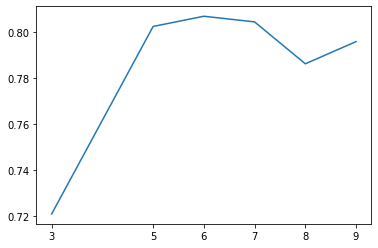

In [47]:
max_depth= [3, 5, 6, 7, 8,9]
scores=[]
for i in max_depth:
    model=DecisionTreeClassifier(class_weight='balanced',max_depth=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores.append(model.score(X_val,y_val))
plt.plot(max_depth, scores)
plt.xticks(max_depth);


# Try different values of min_samples_split 

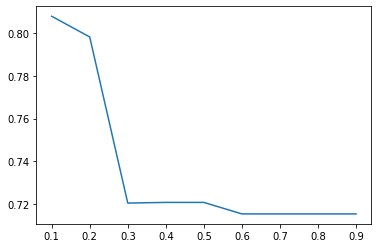

In [54]:
min_samples_split= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
scores_1=[]
for i in min_samples_split:
    model=DecisionTreeClassifier(class_weight='balanced',min_samples_split=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_1.append(model.score(X_val,y_val))
plt.plot(min_samples_split, scores_1)
plt.xticks(min_samples_split);

# Try different values of min_samples_leaf

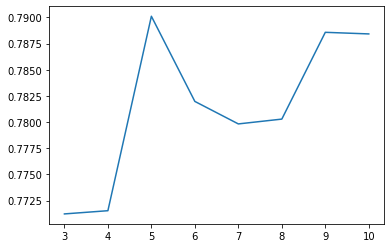

In [57]:
min_samples_leaf=[3,4,5,6,7,8,9,10]
scores_2=[]
for i in min_samples_leaf:
    model=DecisionTreeClassifier(class_weight='balanced',min_samples_leaf=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_2.append(model.score(X_val,y_val))
plt.plot(min_samples_leaf, scores_2)
plt.xticks(min_samples_leaf);

# Try different values of max_features (start with 3 then increase)

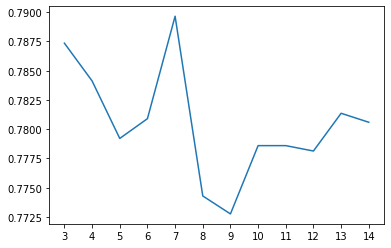

In [60]:
max_features= [3,4,5,6,7,8,9,10,11,12,13,14]
scores_3=[]
for i in max_features:
    model=DecisionTreeClassifier(class_weight='balanced',max_features=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_3.append(model.score(X_val,y_val))
plt.plot(max_features, scores_3)
plt.xticks(max_features);

# Try different values of max_leaf_nodes 

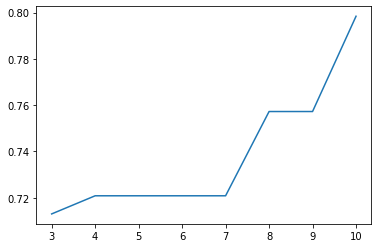

In [61]:
max_leaf_nodes= [3,4,5,6,7,8,9,10]
scores_4=[]
for i in max_leaf_nodes:
    model=DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_4.append(model.score(X_val,y_val))
plt.plot(max_leaf_nodes, scores_4)
plt.xticks(max_leaf_nodes);

# Try different values of ccp_alpha (start with 0.001 then increase)

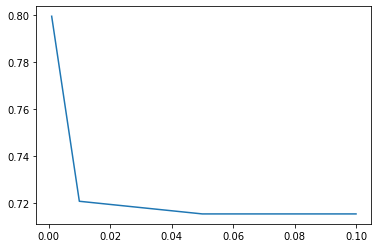

In [63]:
ccp_alpha=[0.001,0.01,0.05,0.1]
scores_5=[]
for i in ccp_alpha:
    model=DecisionTreeClassifier(class_weight='balanced',ccp_alpha=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_5.append(model.score(X_val,y_val))
plt.plot(ccp_alpha, scores_5)
# plt.xticks(ccp_alpha);

In [16]:
# param_grid = {'max_depth': [3, 5, 6, 7, 8,9],
            
#               'max_features': [3,4,5,6,7,8,9,15],
#               'max_leaf_nodes': [3,4,5,6,7,8,9,10],
#               'ccp_alpha':[0.001,0.01,0.05,0.1]}
# grid = GridSearchCV(DecisionTreeClassifier(), param_grid)
# grid.fit(X_train, y_train)
# pred=grid.predict(X_val)

In [17]:
# grid.best_params_

In [18]:
# grid.best_score_

In [19]:
model=DecisionTreeClassifier(class_weight='balanced',ccp_alpha= 0.001, max_depth= 5, max_features= 9, max_leaf_nodes= 10)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))

0.7546068796068796
0.760325502840473
[[3615 1351]
 [ 210 1337]]



              precision    recall  f1-score   support

           0       0.95      0.73      0.82      4966
           1       0.50      0.86      0.63      1547

    accuracy                           0.76      6513
   macro avg       0.72      0.80      0.73      6513
weighted avg       0.84      0.76      0.78      6513



In [21]:
from sklearn.tree import export_graphviz
export_graphviz(
model,feature_names=list(train_data.columns)[0:14],
class_names=list(train_data.columns)[14],
rounded=True,
filled=True
)


'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="relationship <= 0.5\\ngini = 0.5\\nsamples = 26048\\nvalue = [13024.0, 13024.0]\\nclass = n", fillcolor="#ffffff"] ;\n1 [label="education.num <= 10.5\\ngini = 0.403\\nsamples = 10603\\nvalue = [3841.796, 9882.845]\\nclass = n", fillcolor="#86c3ef"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="hours.per.week <= 33.5\\ngini = 0.48\\nsamples = 7086\\nvalue = [3156.774, 4755.188]\\nclass = n", fillcolor="#bcdef6"] ;\n1 -> 2 ;\n3 [label="gini = 0.39\\nsamples = 542\\nvalue = [320.424, 115.879]\\nclass = i", fillcolor="#eeaf81"] ;\n2 -> 3 ;\n4 [label="capital.gain <= 76.0\\ngini = 0.471\\nsamples = 6544\\nvalue = [2836.349, 4639.309]\\nclass = n", fillcolor="#b2d9f5"] ;\n2 -> 4 ;\n5 [label="education.num <= 7.5\\ngini = 0.486\\nsamples = 6214\\nvalue = [2832.394, 3968.864]\\nclass = n", fillcolor="#c6e3f8"] ;\n4 -> 5 ;\n6 [

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model=RandomForestClassifier(n_estimators=100, random_state=2022,bootstrap=True,class_weight='balanced')
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))

0.999884828009828
0.82081989866421
[[4734  232]
 [ 935  612]]



              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4966
           1       0.73      0.40      0.51      1547

    accuracy                           0.82      6513
   macro avg       0.78      0.67      0.70      6513
weighted avg       0.81      0.82      0.80      6513



# n_estimators

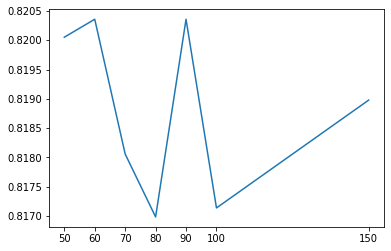

In [64]:
n_estimators=[50, 60, 70, 80, 90,100,150]
scores_6=[]
for i in n_estimators:
    model=RandomForestClassifier(class_weight='balanced',n_estimators=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_6.append(model.score(X_val,y_val))
plt.plot(n_estimators, scores_6)
plt.xticks(n_estimators);

# max_samples 

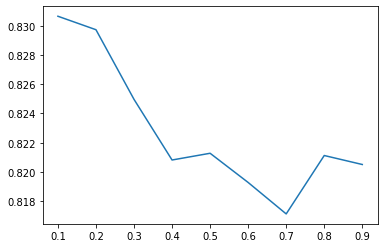

In [65]:
max_samples= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
scores_7=[]
for i in max_samples:
    model=RandomForestClassifier(class_weight='balanced',max_samples=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_7.append(model.score(X_val,y_val))
plt.plot(max_samples, scores_7)
plt.xticks(max_samples);

In [29]:
param_grid = {'n_estimators': [50, 60, 70, 80, 90,100,150]}
grid = GridSearchCV(RandomForestClassifier(), param_grid)
grid.fit(X_train, y_train)
pred=grid.predict(X_val)

In [30]:
grid.best_params_

{'n_estimators': 100}

# KNN

In [66]:
from imblearn.over_sampling import SMOTE
oversampling=SMOTE()
X_train,y_train=oversampling.fit_resample(X_train,y_train)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))

0.8594714994431507
0.676186089359742
[[3462 1504]
 [ 605  942]]



              precision    recall  f1-score   support

           0       0.85      0.70      0.77      4966
           1       0.39      0.61      0.47      1547

    accuracy                           0.68      6513
   macro avg       0.62      0.65      0.62      6513
weighted avg       0.74      0.68      0.70      6513



# Try different p values in the Minkowski distance metric 

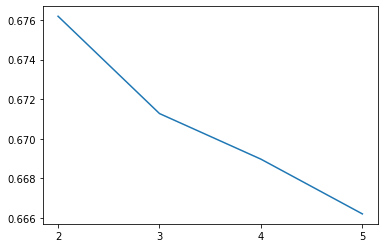

In [70]:
p_value=[2,3,4,5]
scores_8=[]
for i in p_value:
    model = KNeighborsClassifier(p=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_8.append(model.score(X_val,y_val))
plt.plot(p_value,scores_8)
plt.xticks(p_value);

# Try different N_neighbors

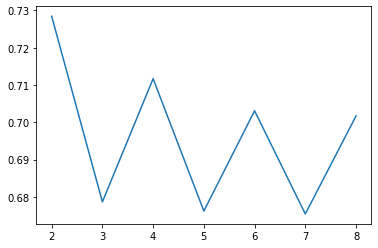

In [72]:
N=[2,3,4,5,6,7,8]
scores_9=[]
for i in N:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_9.append(model.score(X_val,y_val))
plt.plot(N,scores_9)
plt.xticks(N);

# Try ‘uniform’ and ‘distance’ options in the weights hyper-parameter

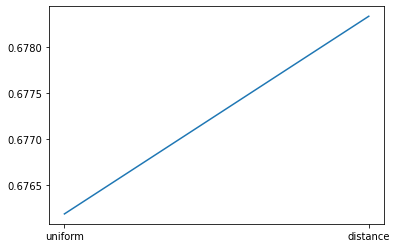

In [76]:
weights=['uniform', 'distance']
scores_10=[]
for i in weights:
    model = KNeighborsClassifier(weights=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_val)
    scores_10.append(model.score(X_val,y_val))
plt.plot(weights,scores_10)
plt.xticks(weights);

In [77]:
param_grid = {'p':[2,3,4,5],
             'n_neighbors':[2,3,4,5,6,7,8],
             'weights':['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X_train, y_train)
pred=grid.predict(X_val)

In [78]:
grid.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [79]:
grid.best_score_

0.8458289979344811

In [80]:
model = KNeighborsClassifier(n_neighbors= 2, p= 2, weights= 'distance')
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
pred=model.predict(X_val)
print(model.score(X_val,y_val))
print(confusion_matrix(y_val,pred))
print("\n\n")
print(classification_report(y_val,pred))

0.999974688670649
0.6927683095347766
[[3807 1159]
 [ 842  705]]



              precision    recall  f1-score   support

           0       0.82      0.77      0.79      4966
           1       0.38      0.46      0.41      1547

    accuracy                           0.69      6513
   macro avg       0.60      0.61      0.60      6513
weighted avg       0.71      0.69      0.70      6513



---------------

$$ Submitted \space by: \space Ahmed \space Azzam $$